# LAB 3: KNN MODEL USING BINARY CLASSIFIER

# Q1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statistics as st
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/Heart_Dataset_non_categorical.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape

(303, 14)

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
X = data.drop(columns='target')
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
Y = data['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
data.corr()['target'].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [10]:
not_pat, pat = Y.value_counts()
print('Percentage of healthy patients:', not_pat/len(Y)*100, '%')
print('Percentage of heart patients:', pat/len(Y)*100, '%')

Percentage of healthy patients: 54.45544554455446 %
Percentage of heart patients: 45.54455445544555 %


<Axes: ylabel='count'>

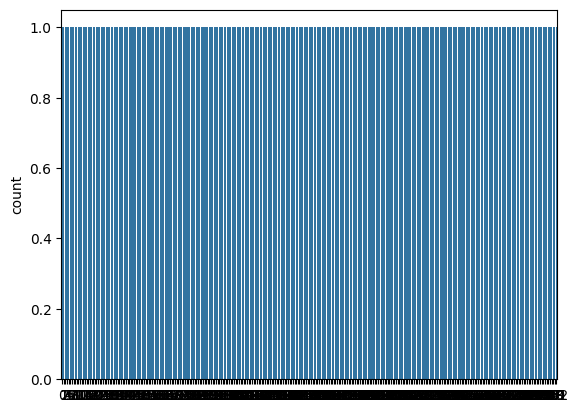

In [11]:
sns.countplot(Y)

<Axes: xlabel='sex', ylabel='target'>

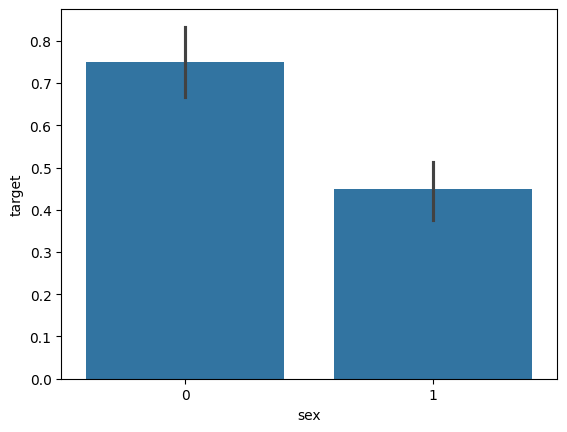

In [12]:
sns.barplot(x=data['sex'], y=Y) 

<Axes: xlabel='cp', ylabel='target'>

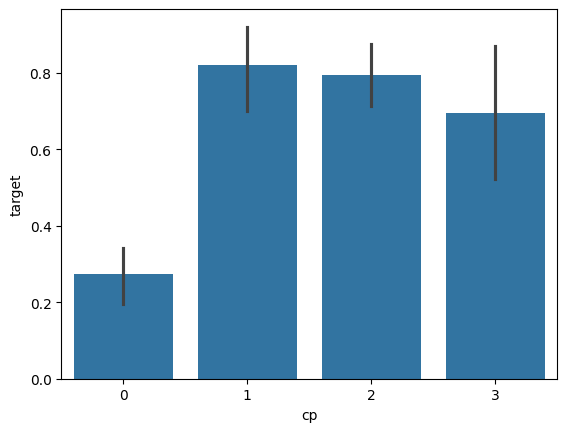

In [13]:
sns.barplot(x=data['cp'], y=Y) 

<Axes: xlabel='fbs', ylabel='target'>

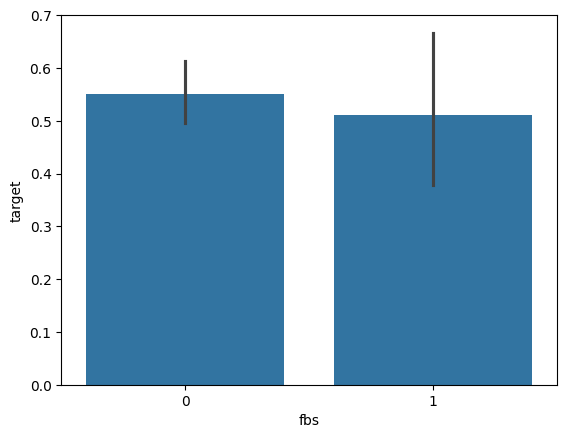

In [14]:
sns.barplot(x=data['fbs'], y=Y) 

<Axes: xlabel='restecg', ylabel='target'>

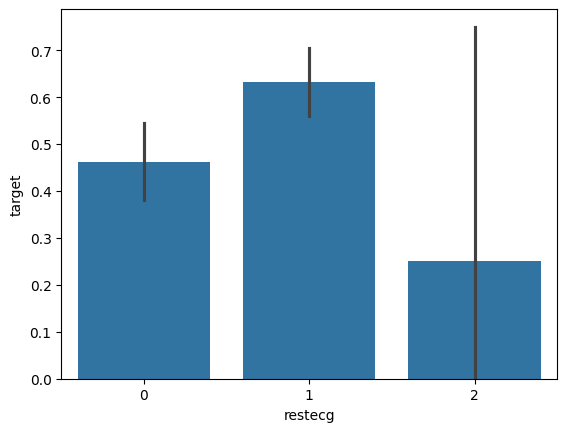

In [15]:
sns.barplot(x=data['restecg'], y=Y) 

<Axes: xlabel='exang', ylabel='target'>

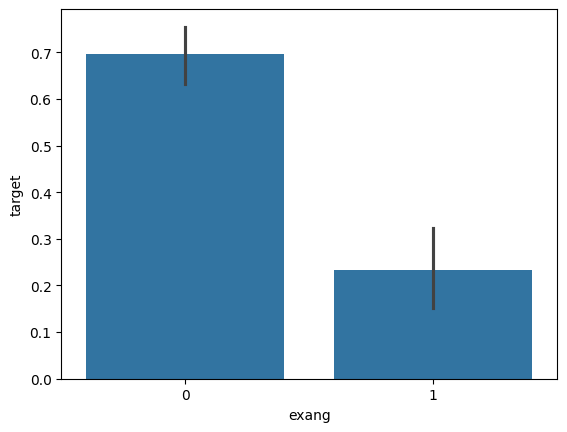

In [16]:
sns.barplot(x=data['exang'], y=Y) 

<Axes: xlabel='slope', ylabel='target'>

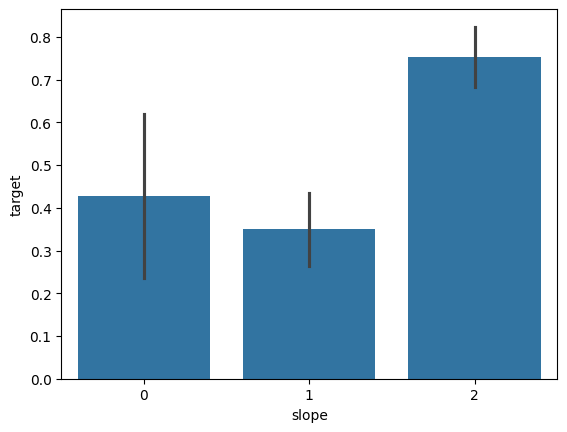

In [17]:
sns.barplot(x=data['slope'], y=Y) 

<Axes: xlabel='ca', ylabel='target'>

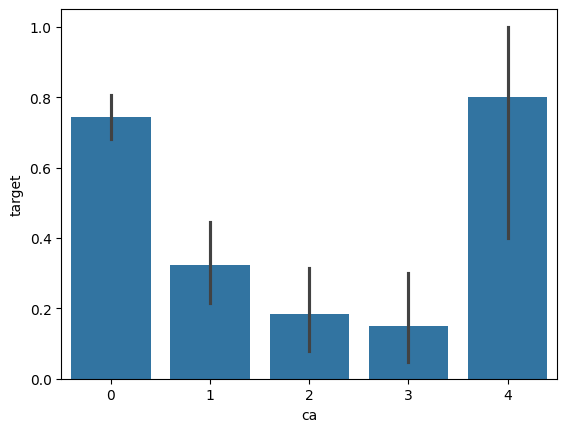

In [18]:
sns.barplot(x=data['ca'], y=Y) 

<Axes: xlabel='thal', ylabel='target'>

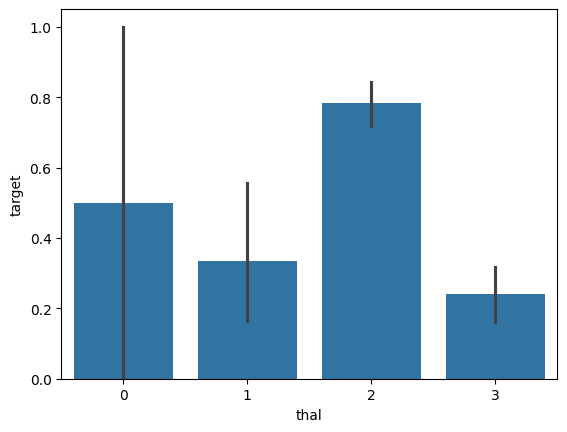

In [19]:
sns.barplot(x=data['thal'], y=Y) 

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
norm_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [21]:
X = norm_X
test = X.loc[298]
test

age         0.583333
sex         0.000000
cp          0.000000
trestbps    0.433962
chol        0.262557
fbs         0.000000
restecg     0.500000
thalach     0.396947
exang       1.000000
oldpeak     0.032258
slope       0.500000
ca          0.000000
thal        1.000000
Name: 298, dtype: float64

In [22]:
def my_knn_classifier1(test, X, Y, k):
    sub_res = abs(test - X)
    summed_res = sub_res.sum(axis=1)
    sorted_res = summed_res.argsort()
    outputs = Y[sorted_res]
    k_top = outputs[:k]
    return k_top.mode()

In [23]:
def my_knn_classifier2(test, X, Y, k):
    sub_res = test - X
    squared_res = sub_res**2
    summed_res = squared_res.sum(axis=1)
    euclidean_res = summed_res ** 0.5
    sorted_res = euclidean_res.argsort()
    outputs = Y[sorted_res]
    k_top = outputs[:k]
    return k_top.mode()

In [24]:
my_knn_classifier1(X.loc[0], X, Y, 3)

0    1
Name: target, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0) 
print(X_train.shape )
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Q2. 

In [26]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score


In [27]:
classifier1 = KNeighborsClassifier(n_neighbors=7)
model1=classifier1.fit(X_train, Y_train)
pred_Y = model1.predict(X_test) 
print("The accuracy is "+str(metrics.accuracy_score(Y_test,pred_Y)*100)+"%") 
print(confusion_matrix(Y_test, pred_Y))

print("The accuracy is", accuracy_score(Y_test, pred_Y)*100, "%")
print("The recall score is", recall_score(Y_test, pred_Y)*100, "%")
print("The precision is", precision_score(Y_test, pred_Y)*100, "%")
print("The roc score is", roc_auc_score(Y_test, pred_Y)*100, "%")

The accuracy is 90.1639344262295%
[[23  4]
 [ 2 32]]
The accuracy is 90.1639344262295 %
The recall score is 94.11764705882352 %
The precision is 88.88888888888889 %
The roc score is 89.65141612200436 %


# Q3.

In [28]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
model=classifier3.fit(X_train, Y_train)
pred_Y = model.predict(X_test) 
print("The accuracy for k=3 is "+str(metrics.accuracy_score(Y_test,pred_Y)*100)+"%") 

classifier6 = KNeighborsClassifier(n_neighbors=6)
model=classifier6.fit(X_train, Y_train)
pred_Y = model.predict(X_test) 
print("The accuracy for k=6 is "+str(metrics.accuracy_score(Y_test,pred_Y)*100)+"%") 

classifier8 = KNeighborsClassifier(n_neighbors=8)
model=classifier8.fit(X_train, Y_train)
pred_Y = model.predict(X_test) 
print("The accuracy for k=8 is "+str(metrics.accuracy_score(Y_test,pred_Y)*100)+"%") 

classifier9 = KNeighborsClassifier(n_neighbors=9)
model=classifier9.fit(X_train, Y_train)
pred_Y = model.predict(X_test) 
print("The accuracy for k=9 is "+str(metrics.accuracy_score(Y_test,pred_Y)*100)+"%") 

The accuracy for k=3 is 86.88524590163934%
The accuracy for k=6 is 85.24590163934425%
The accuracy for k=8 is 86.88524590163934%
The accuracy for k=9 is 85.24590163934425%


# Q4.

In [29]:
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model1=classifier1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test) 
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred1)*100)+"%") 
print(confusion_matrix(Y_test, Y_pred1))

The accuracy is 88.52459016393442%
[[22  5]
 [ 2 32]]


# Q6.

In [30]:
from ucimlrepo import fetch_ucirepo 

In [35]:
spambase = fetch_ucirepo(id=94) 
X_spam = spambase.data.features 
y_spam = spambase.data.targets 

In [38]:
norm_spam = pd.DataFrame(scaler.fit_transform(X_spam), columns=X_spam.columns)
norm_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.0,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.0,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.0,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861


In [39]:
x_trainspam, x_testspam, y_trainspam, y_testspam = train_test_split(X_spam, y_spam, random_state=0, test_size=0.2)
print(x_trainspam.shape, x_testspam.shape, y_trainspam.shape, y_testspam.shape, sep='\n')

(3680, 57)
(921, 57)
(3680, 1)
(921, 1)


In [45]:
classifier_spam = KNeighborsClassifier(n_neighbors=5)
classifier_spam.fit(x_trainspam, y_trainspam)
pred_Yspam = classifier_spam.predict(x_testspam)
print("The accuracy is", accuracy_score(y_testspam, pred_Yspam)*100, "%")

The accuracy is 80.56460369163952 %


/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
